X1 shape (20, 20) , b shape (20, 20)
y shape (20, 20)


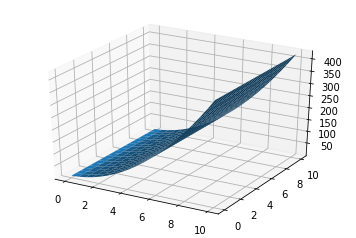

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
x1 = np.linspace(0,10,20)
b= np.linspace(0,10,20)
X1,b = np.meshgrid(x1, b)
print("X1 shape {} , b shape {}".format(X1.shape,b.shape))
Y = 3 + 2*X1 + 4*X1*X1 
print("y shape",Y.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1,b, Y)
plt.show()

In [3]:
# I will try to verify the universal approximation theorem on an arbitrary function 

import torch
from torch import nn
from torch.autograd import Variable
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch.optim as optim



In [35]:
def generate_dataset(size = 100):
    # equation: y = 3 + 2x+4x^2
    x = torch.unsqueeze(torch.linspace(-1, 1, size), dim=1)  # x data (tensor), shape=(100, 1)
    y =  0.3*torch.rand(x.size()) + 2*x + 7* x.pow(2)  
    return x, y
generate_dataset(10)

(
 -1.0000
 -0.7778
 -0.5556
 -0.3333
 -0.1111
  0.1111
  0.3333
  0.5556
  0.7778
  1.0000
 [torch.FloatTensor of size 10x1], 
  5.2334
  2.8918
  1.1290
  0.3645
  0.0445
  0.4008
  1.6058
  3.3449
  5.8036
  9.2646
 [torch.FloatTensor of size 10x1])

In [36]:
import torch


class linear_regr(torch.nn.Module):
    def __init__(self, in_dim, out_dim):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(linear_regr, self).__init__()
        self.fc1 = torch.nn.Linear(in_dim, out_dim)

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        #print(x)
        y_pred = self.fc1(x)

        return y_pred

In [37]:
# define critereon - loss function
lm=linear_regr(1,1)

# define optimizer
optimizer = optim.SGD(lm.parameters(), lr=0.01, momentum=0.01)
critereon = nn.MSELoss()

In [38]:
inputs, labels = generate_dataset(1000)
nb_epochs = 200
for epoch in range(nb_epochs):
    epoch_loss = 0
    for ix, x in enumerate(inputs):
        # here x is the input. i.e. the input value of x
        # and y_train[ix] is the output. i.e. y = f(x) = 3x + 4
        y_pred = lm(Variable(torch.Tensor(x)))
        
        loss = critereon(y_pred, Variable(torch.Tensor(labels[ix])))
        
        epoch_loss = loss.data[0]
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Epoch {} : Loss {}".format(epoch, epoch_loss))

Epoch 0 : Loss 0.6939862370491028
Epoch 1 : Loss 0.3855631947517395
Epoch 2 : Loss 0.37308570742607117
Epoch 3 : Loss 0.37249526381492615
Epoch 4 : Loss 0.3724673390388489
Epoch 5 : Loss 0.37246617674827576
Epoch 6 : Loss 0.37246617674827576
Epoch 7 : Loss 0.37246617674827576
Epoch 8 : Loss 0.37246617674827576
Epoch 9 : Loss 0.37246617674827576
Epoch 10 : Loss 0.37246617674827576
Epoch 11 : Loss 0.37246617674827576
Epoch 12 : Loss 0.37246617674827576
Epoch 13 : Loss 0.37246617674827576
Epoch 14 : Loss 0.37246617674827576
Epoch 15 : Loss 0.37246617674827576
Epoch 16 : Loss 0.37246617674827576
Epoch 17 : Loss 0.37246617674827576
Epoch 18 : Loss 0.37246617674827576
Epoch 19 : Loss 0.37246617674827576
Epoch 20 : Loss 0.37246617674827576
Epoch 21 : Loss 0.37246617674827576
Epoch 22 : Loss 0.37246617674827576
Epoch 23 : Loss 0.37246617674827576
Epoch 24 : Loss 0.37246617674827576
Epoch 25 : Loss 0.37246617674827576
Epoch 26 : Loss 0.37246617674827576
Epoch 27 : Loss 0.37246617674827576
Epoch

In [39]:
inputs, labels = generate_dataset(100)
collect_pred=[]
for ix, x in enumerate(inputs):
        # here x is the input. i.e. the input value of x
        # and y_train[ix] is the output. i.e. y = f(x) = 3x + 4
        y_pred = lm(Variable(x))
        collect_pred.append(y_pred.data[0])
        print("true value :{} , predicted value :{}".format(labels[ix], y_pred))
        

true value :
 5.0792
[torch.FloatTensor of size 1]
 , predicted value :Variable containing:
-4.6406
[torch.FloatTensor of size 1]

true value :
 5.0433
[torch.FloatTensor of size 1]
 , predicted value :Variable containing:
-4.5058
[torch.FloatTensor of size 1]

true value :
 4.7534
[torch.FloatTensor of size 1]
 , predicted value :Variable containing:
-4.3710
[torch.FloatTensor of size 1]

true value :
 4.4884
[torch.FloatTensor of size 1]
 , predicted value :Variable containing:
-4.2361
[torch.FloatTensor of size 1]

true value :
 4.2964
[torch.FloatTensor of size 1]
 , predicted value :Variable containing:
-4.1013
[torch.FloatTensor of size 1]

true value :
 4.0076
[torch.FloatTensor of size 1]
 , predicted value :Variable containing:
-3.9665
[torch.FloatTensor of size 1]

true value :
 3.9061
[torch.FloatTensor of size 1]
 , predicted value :Variable containing:
-3.8316
[torch.FloatTensor of size 1]

true value :
 3.4991
[torch.FloatTensor of size 1]
 , predicted value :Variable con

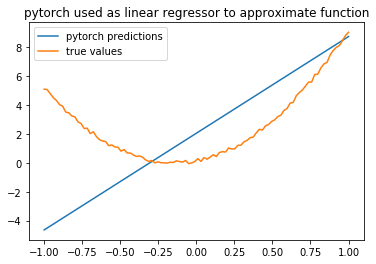

In [40]:
labels=[a.numpy().tolist()[0] for a in labels]
import matplotlib.pyplot as plt
import numpy as np


plt.plot(inputs.numpy().flatten(), collect_pred)
plt.plot(inputs.numpy().flatten(), labels)
plt.legend(['pytorch predictions', 'true values'], loc='upper left')
plt.title("pytorch used as linear regressor to approximate function")
plt.show()

torch.Size([1000, 1]) torch.Size([1000, 1])


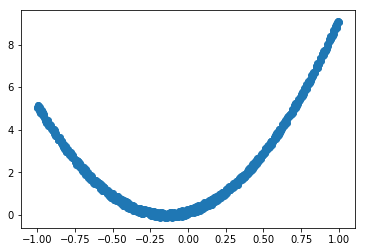

In [41]:
#x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
#y =  0.3*torch.rand(x.size()) + 2*x +  x.pow(2)               # noisy y data (tensor), shape=(100, 1)
x,y =generate_dataset(1000)
# torch can only train on Variable, so convert them to Variable
#The code below is deprecated in Pytorch 0.4. Now, autograd directly supports tensors
x, y = Variable(x), Variable(y)
print(x.size() ,y.size())
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [42]:
import torch.nn.functional as F
class poly_approx(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(poly_approx, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x



poly_approx(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


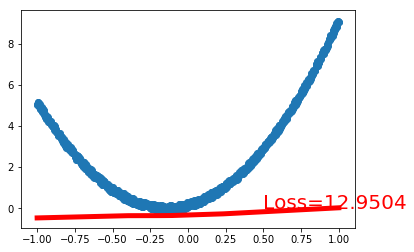

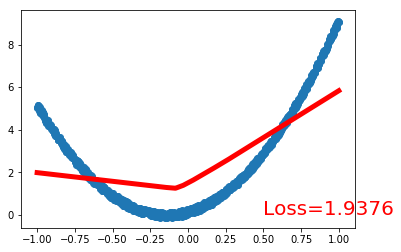

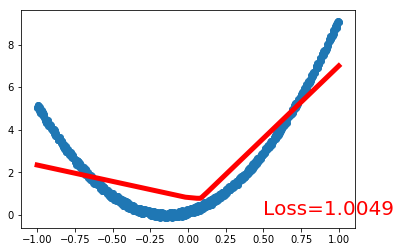

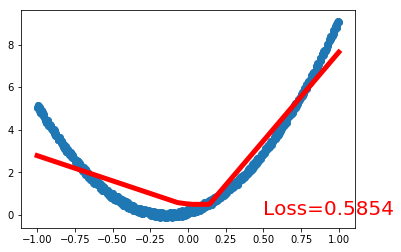

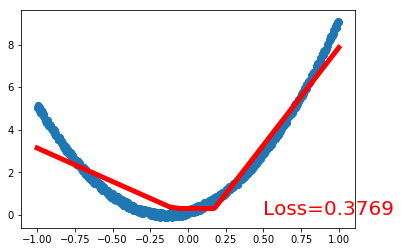

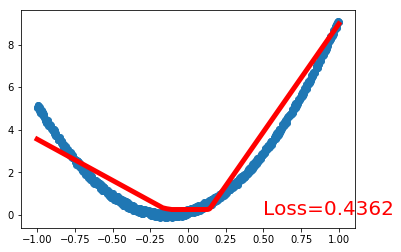

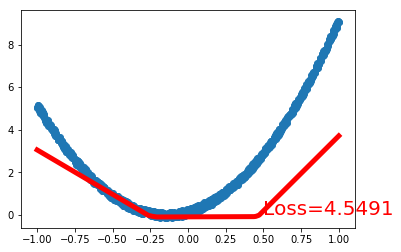

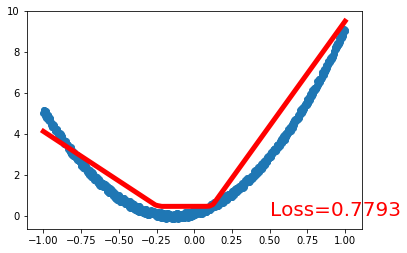

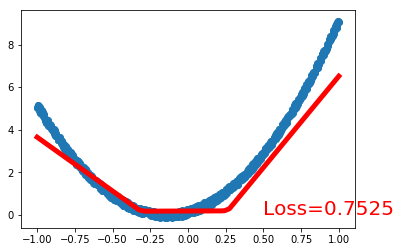

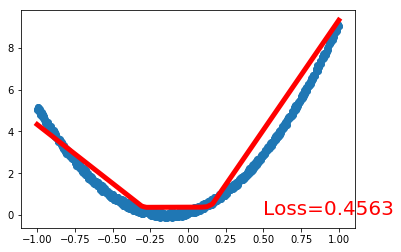

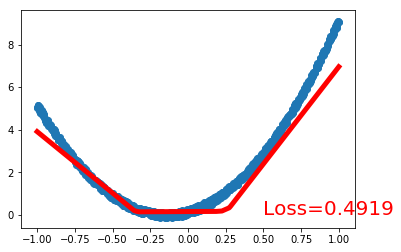

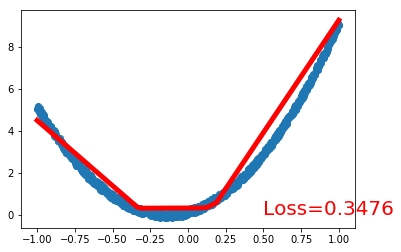

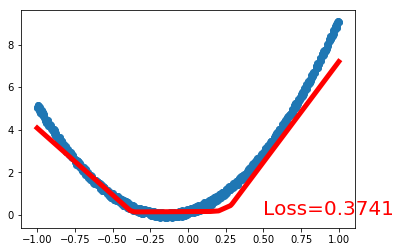

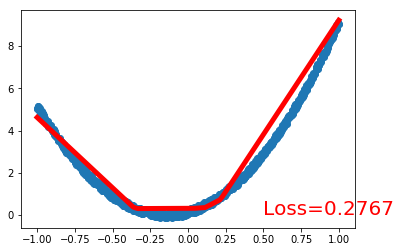

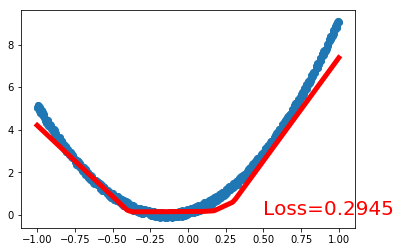

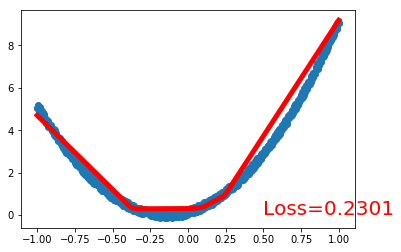

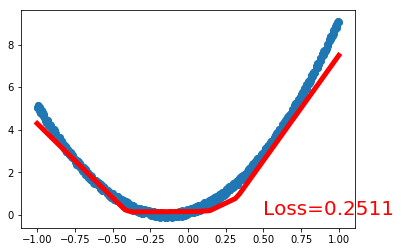

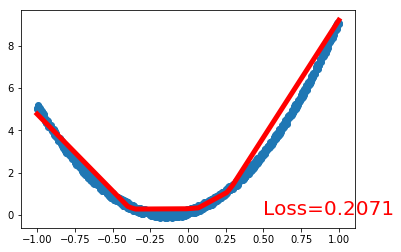

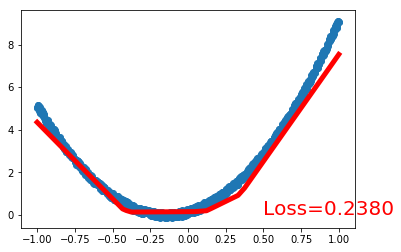

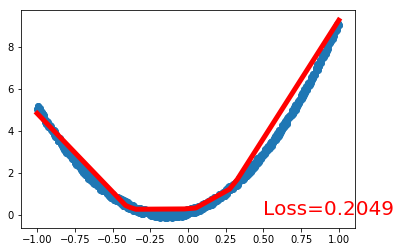

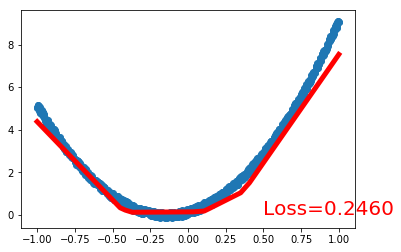

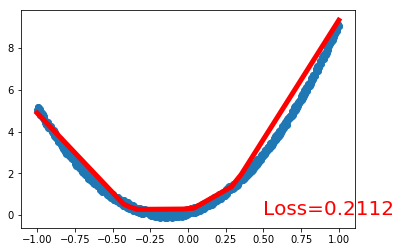

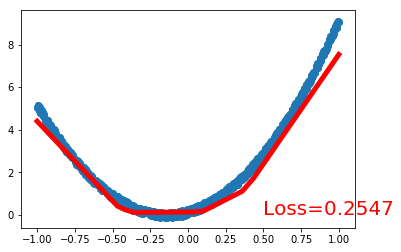

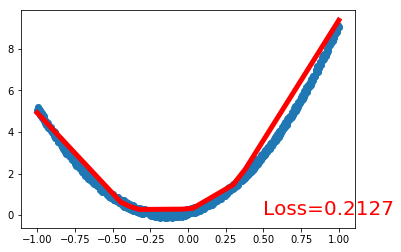

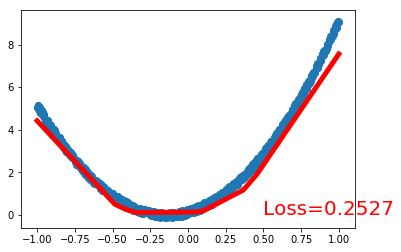

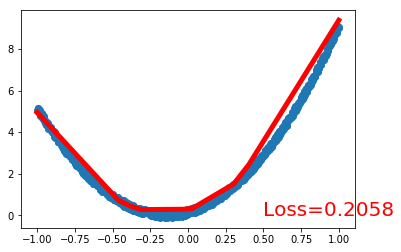

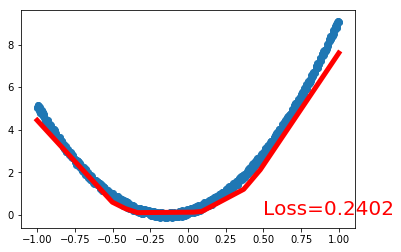

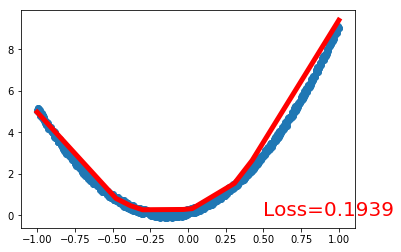

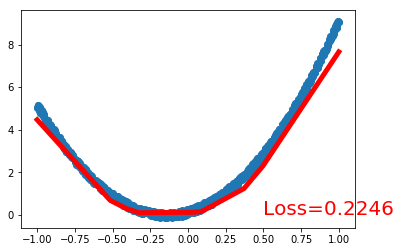

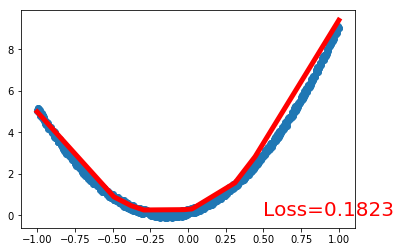

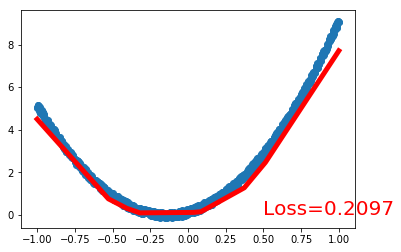

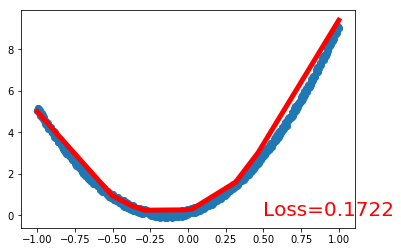

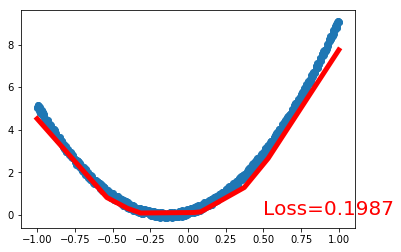

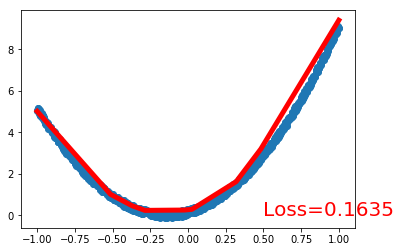

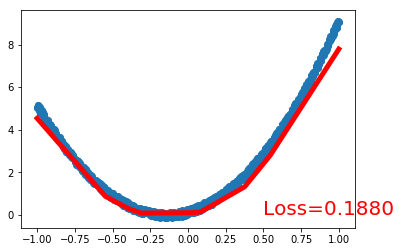

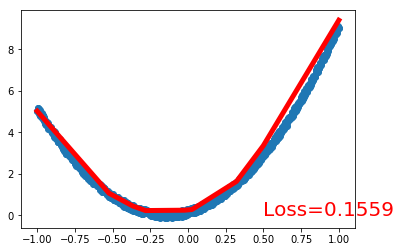

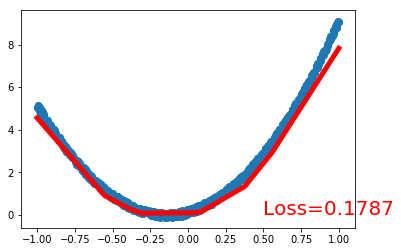

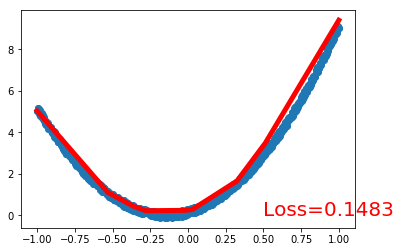

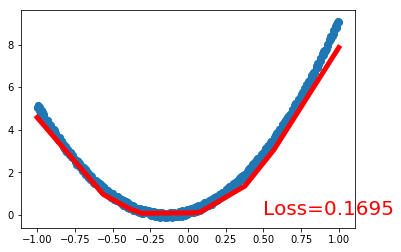

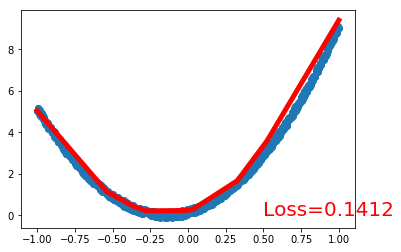

In [43]:

poly_regr = poly_approx(n_feature=1, n_hidden=10, n_output=1)     # define the network
print(poly_regr)  # net architecture

optimizer = torch.optim.SGD(poly_regr.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

plt.ion()   # something about plotting

for t in range(200):
    prediction = poly_regr(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()
